In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts

#to show all cols in df
from IPython.display import display
pd.options.display.max_columns = None

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import requests
import re
import plotly.plotly as py
import cufflinks as cf

import warnings
warnings.simplefilter('ignore')

init_notebook_mode(connected=True)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg' 


from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 15
plt.rcParams['image.cmap'] = 'viridis'

import seaborn as sns
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import xgboost
import seaborn as sns

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [10]:
 pd.options.display.max_rows = 200

In [4]:
data = pd.read_csv('data.csv', sep=';')

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SaleCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Работа с Null значениями

Разберемся с отсутсвующими значениями. Так как данных немного, стратегия удаления строчек с нулевыми значениями не подойдет.

In [13]:
x_nl = data.isnull().sum()

In [14]:
x_nl[data.isnull().sum() > 1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [18]:
data['LotFrontage'].head(3) #ширина жилья

0    65.0
1    80.0
2    68.0
Name: LotFrontage, dtype: float64

In [17]:
data['Alley'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object

In [20]:
data['MiscFeature'].head(5)#другие признаки 

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: MiscFeature, dtype: object

In [21]:
data['Fence'].head(5)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Fence, dtype: object

Удалим столбец 'MiscFeature' с категориальными данными, где больше 1400 пропущенно и которые включает в себя различные признаки с описанием , он малоинформативен и достаточно тяжело будет его ввести в модель так, чтобы это принесло пользу, учитывая то, что в нем больше 1400 не заполнено.

In [22]:
сols_to_drop = ['MiscFeature']

In [23]:
data.drop(сols_to_drop,axis=1,inplace=True)

Другие сильно незаполненные категориальные признаки Alley PoolQC  Fence удалять не будем, хоть из немного, но они достаточно ощутимо могут повлиять на цену.Они достаточно информативны, чтобы даже не очень большим количеством повлиять на результаты. Заполним NaN в них значениями индикаторами об отсутсвии данного признака, чтобы потом моно было легко провести их кодирование в количественные переменные.

In [25]:
data['Alley'] = data['Alley'].replace(np.nan, 'No alley access')
data['PoolQC'] =data['PoolQC'].replace(np.nan,'No Pool')
data['Fence'] = data['Fence'].replace(np.nan, 'No Fence')
data['FireplaceQu'] = data['FireplaceQu'].replace(np.nan,'No FireplaceQu')

In [30]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Заполним пропуски в годе постройки гаража средним значением

In [38]:
mean_garage_year = round(data['GarageYrBlt'].mean())

In [39]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(mean_garage_year)

In [40]:
data['GarageFinish'].dtype

dtype('O')

Остальные категориальные переменные гаража заменим на No Garage

In [41]:
cols_obj_garage = [x for x in data.columns if 'Garage' in x and x != 'GarageYrBlt']

In [42]:
for x in data[cols_obj_garage].columns:
    data[x] = data[x].replace(np.nan,'No Garage')

Теперь посмотрим на переменные Basement

In [43]:
basem_cols = [x for x in data.columns if 'Bsmt' in x]

In [51]:
data[basem_cols].isnull().sum() 

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64

In [58]:
data['MasVnrArea'].dtype

dtype('float64')

In [57]:
for x in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    data[x] = data[x].replace(np.nan,'No Bsmt')

In [62]:
data[data['MasVnrArea'].isnull()]['MasVnrArea']

234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

Заменим MasVnrArea на 0, так как в этом столбце много 0, которые видимо обозначает ее отсутсвие. Можем предположить, что np.nan в этом столбце может обозначать тоже самон

In [63]:
data['MasVnrArea'] = data['MasVnrArea'].replace(np.nan,0)

In [64]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [65]:
data['MasVnrType'] = data['MasVnrType'].replace(np.nan,'None')

In [133]:
data['LotFrontage'].fillna(data['LotFrontage'].mean(),inplace=True)

### Анализ корреляции и взаимосвязей

In [71]:
corr = data.corr(method='pearson')

In [72]:
corr[abs(corr) > 0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.516778,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.658386
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.779457,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 


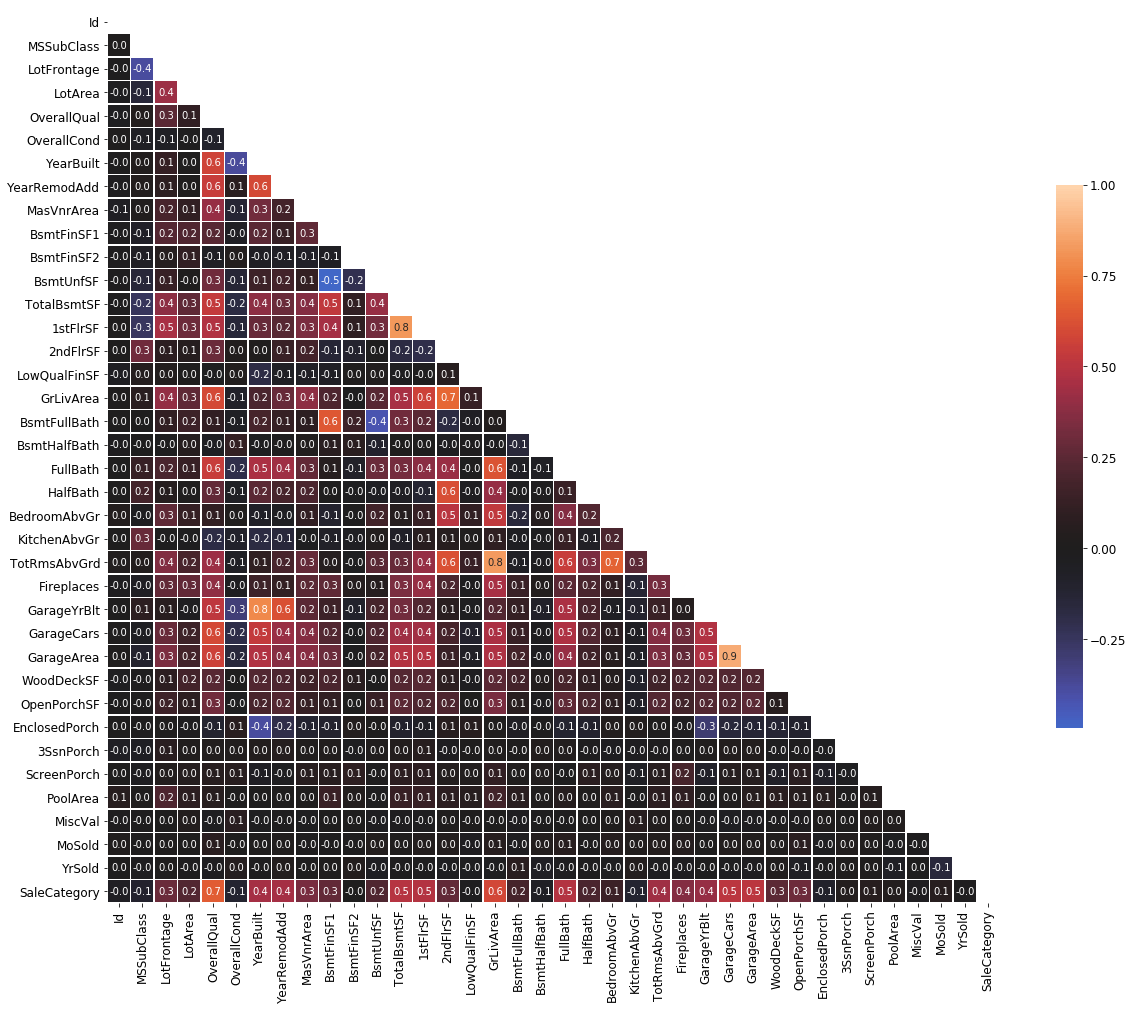

In [86]:
plt.figure(figsize=(20,20))
# Create a mask to hide the upper triangle of the correlation matrix (which is symmetric)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True



sns.heatmap(corr, mask=mask, vmax=1, center=0, annot=True, fmt='.1f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Визуализируем взаимосвязи между целевой переменной и теми, между которыми есть наибольшая корреляция

In [90]:
sorted([data.columns])

[Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [99]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Можем видеть, что классы целевой переменной несбалансированы, надо будет впоследствии применять стратифицированное разбиение на тестовую и тренировучную выборки. Среднее качество невоское, около 5, все желие продавалось в основном между 2006 и 2010 годом. Скорее всего, жилье в датасете относится к невысокой ценовой категории и не входит в вип категории для жилья.

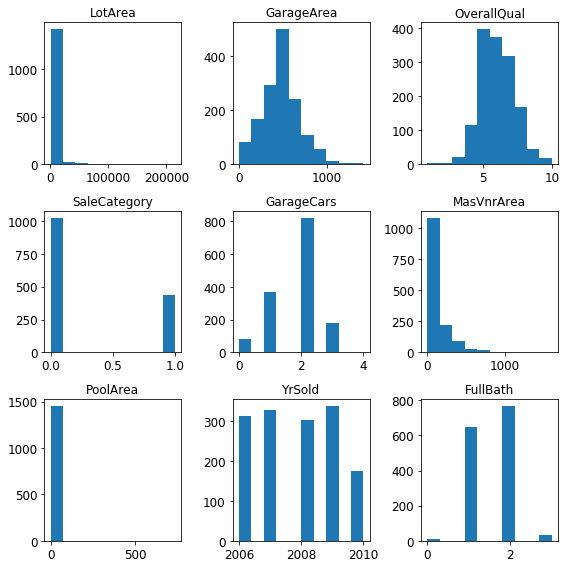

<Figure size 360x360 with 0 Axes>

In [109]:
fig, axes = plt.subplots(3,3,figsize=(8,8))
for col, ax in zip(['LotArea','GarageArea','OverallQual','SaleCategory','GarageCars','MasVnrArea','PoolArea','YrSold','FullBath'],axes.flat):
    ax.hist(data[col])
    ax.set_title(col)
plt.tight_layout()
plt.figure(figsize=(5,5));

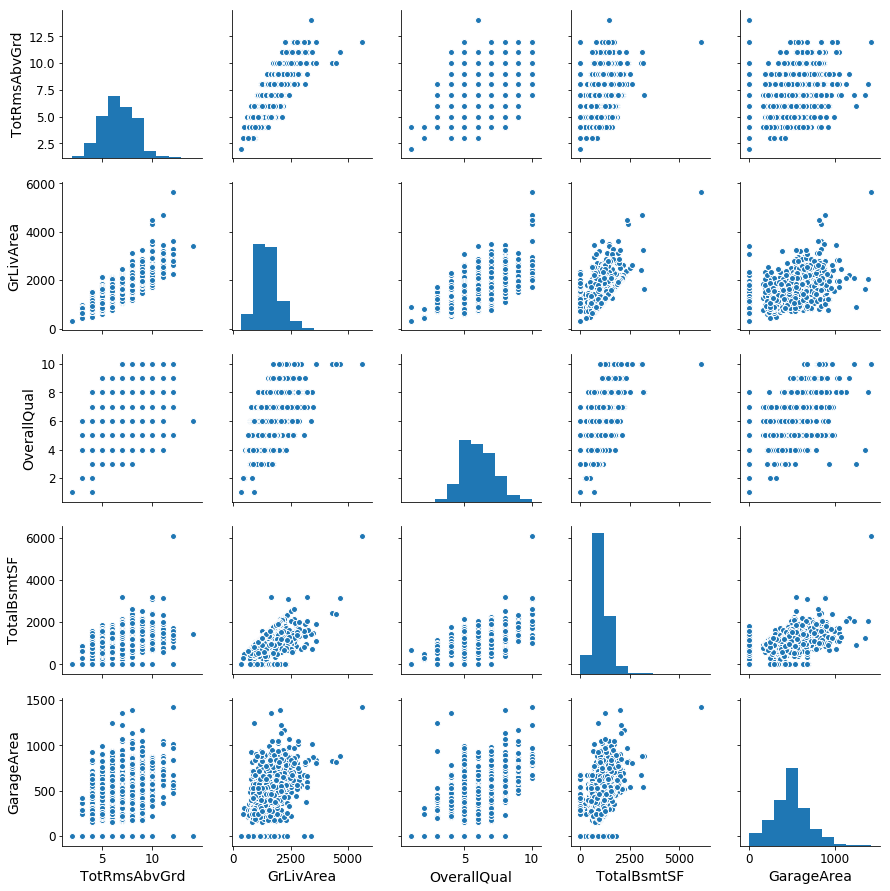

In [94]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['TotRmsAbvGrd','GrLivArea',
                   'OverallQual', 
                'TotalBsmtSF','GarageArea']]);

Можем видеть, что многие признаки коррелируют между собой. Например, количество машин в гаража сильно зависит с его общей площадью,оценка общего качества дома сильно зависит от наличия от количественных покаателей жилья. Для просто расчетов оставим их в модели и будем проводить дальнейшие расчеты с ними

### Разбираемся с категориальными переменными

In [110]:
сategorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

In [111]:
сategorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [114]:
for x in сategorical_columns:
    data = pd.concat([data, pd.get_dummies(data[x], prefix=x)], axis=1)
    data = data.drop(x, axis=1)

In [116]:
data.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCategory,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_No Bsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Bsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No FireplaceQu,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageT

In [117]:
col_no = [x for x in data.columns if 'No' in x]

In [118]:
col_no

['Alley_No alley access',
 'Utilities_NoSeWa',
 'Neighborhood_NoRidge',
 'Condition1_Norm',
 'Condition2_Norm',
 'MasVnrType_None',
 'BsmtQual_No Bsmt',
 'BsmtCond_No Bsmt',
 'BsmtExposure_No',
 'BsmtExposure_No Bsmt',
 'BsmtFinType1_No Bsmt',
 'BsmtFinType2_No Bsmt',
 'FireplaceQu_No FireplaceQu',
 'GarageType_No Garage',
 'GarageFinish_No Garage',
 'GarageQual_No Garage',
 'GarageCond_No Garage',
 'PoolQC_No Pool',
 'Fence_No Fence',
 'SaleCondition_Normal']

In [119]:
data.drop(['BsmtFinType1_No Bsmt','BsmtCond_No Bsmt','BsmtFinType2_No Bsmt','BsmtQual_No Bsmt','GarageCond_No Garage','GarageQual_No Garage','GarageFinish_No Garage'],axis=1,inplace=True)

In [120]:
col_no = [x for x in data.columns if 'No' in x]

In [121]:
col_no

['Alley_No alley access',
 'Utilities_NoSeWa',
 'Neighborhood_NoRidge',
 'Condition1_Norm',
 'Condition2_Norm',
 'MasVnrType_None',
 'BsmtExposure_No',
 'BsmtExposure_No Bsmt',
 'FireplaceQu_No FireplaceQu',
 'GarageType_No Garage',
 'PoolQC_No Pool',
 'Fence_No Fence',
 'SaleCondition_Normal']

In [122]:
data.drop(['BsmtExposure_No Bsmt'],axis=1, inplace=True)

### Сокращение размерности с помощью PCA

In [123]:
from sklearn.decomposition import PCA

In [142]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

In [143]:
scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

In [136]:
pca = PCA(n_components=2)

In [137]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [138]:
X_pca = pca.transform(x_train_scaled)

Text(0,0.5,'Вторая главная компонента')

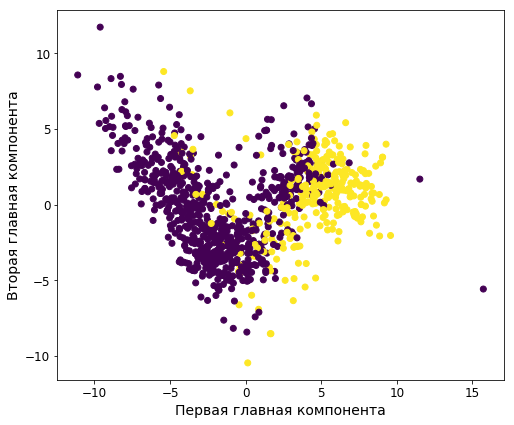

In [139]:
plt.figure(figsize=(8,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_train)
plt.gca().set_aspect('equal')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')

In [140]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100


Можно видеть, что первые две компоненты достаточно плохо объясняют дисперсиб в данных

In [141]:
pca = PCA(n_components=50)

In [144]:
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [145]:
X_pca = pca.transform(x_train_scaled)

In [146]:
for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.315
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.371
n-components=24, explained variance 0.380
n

50 компоненты объяснили больше 50% дисперсии в данных

In [150]:
data.shape[1]

291

In [151]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

pca = PCA(n_components=150)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.316
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.372
n-components=24, explained variance 0.380
n

А вот 150 главных компонент объясняют уже больше 90% дисперсии. Это больше чем на 100 переменных меньше, чем в исходных данных.

Text(0,0.5,'explained_variance_ratio_')

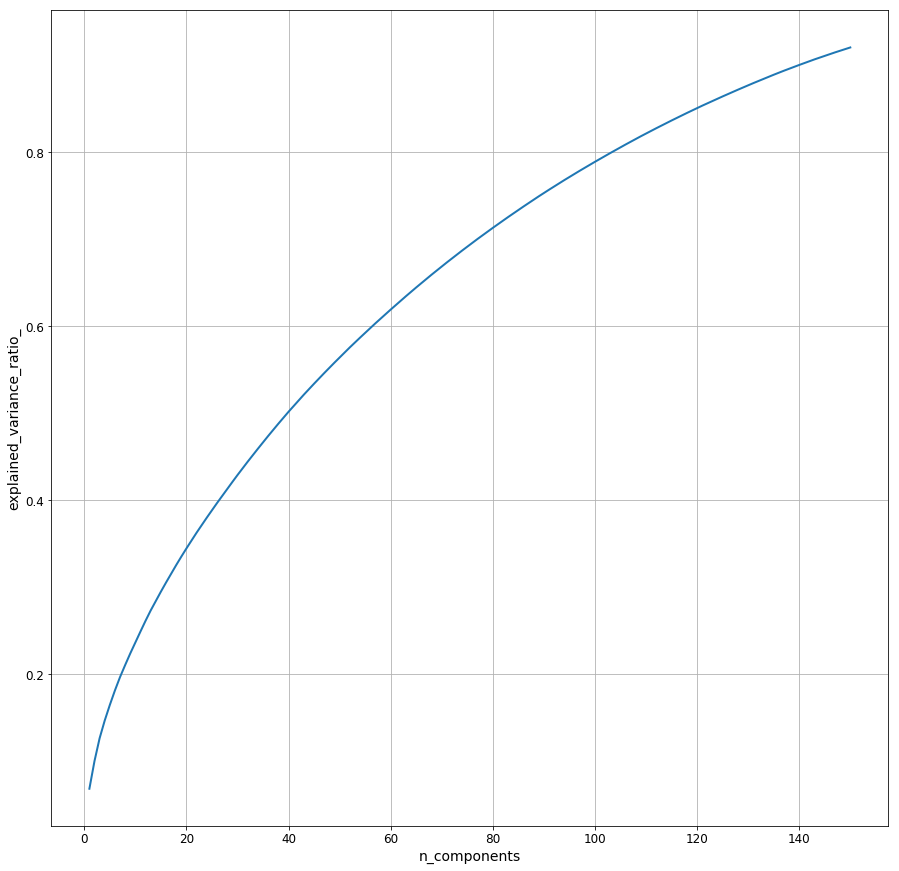

In [152]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [179]:
y = data['SaleCategory'].copy()
x = data.drop('SaleCategory',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_scaled = scaler.fit(x_train)
x_train_scaled=  x_scaled.transform(x_train)
x_test_scaled = x_scaled.transform(x_test)

pca = PCA(n_components=220)
pca.fit(x_train_scaled)
X_pca = pca.transform(x_train_scaled)

for i in range(1, X_pca.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.068
n-components=2, explained variance 0.100
n-components=3, explained variance 0.126
n-components=4, explained variance 0.147
n-components=5, explained variance 0.165
n-components=6, explained variance 0.181
n-components=7, explained variance 0.197
n-components=8, explained variance 0.211
n-components=9, explained variance 0.224
n-components=10, explained variance 0.237
n-components=11, explained variance 0.249
n-components=12, explained variance 0.262
n-components=13, explained variance 0.273
n-components=14, explained variance 0.284
n-components=15, explained variance 0.295
n-components=16, explained variance 0.305
n-components=17, explained variance 0.316
n-components=18, explained variance 0.326
n-components=19, explained variance 0.335
n-components=20, explained variance 0.345
n-components=21, explained variance 0.354
n-components=22, explained variance 0.363
n-components=23, explained variance 0.372
n-components=24, explained variance 0.380
n

Text(0,0.5,'explained_variance_ratio_')

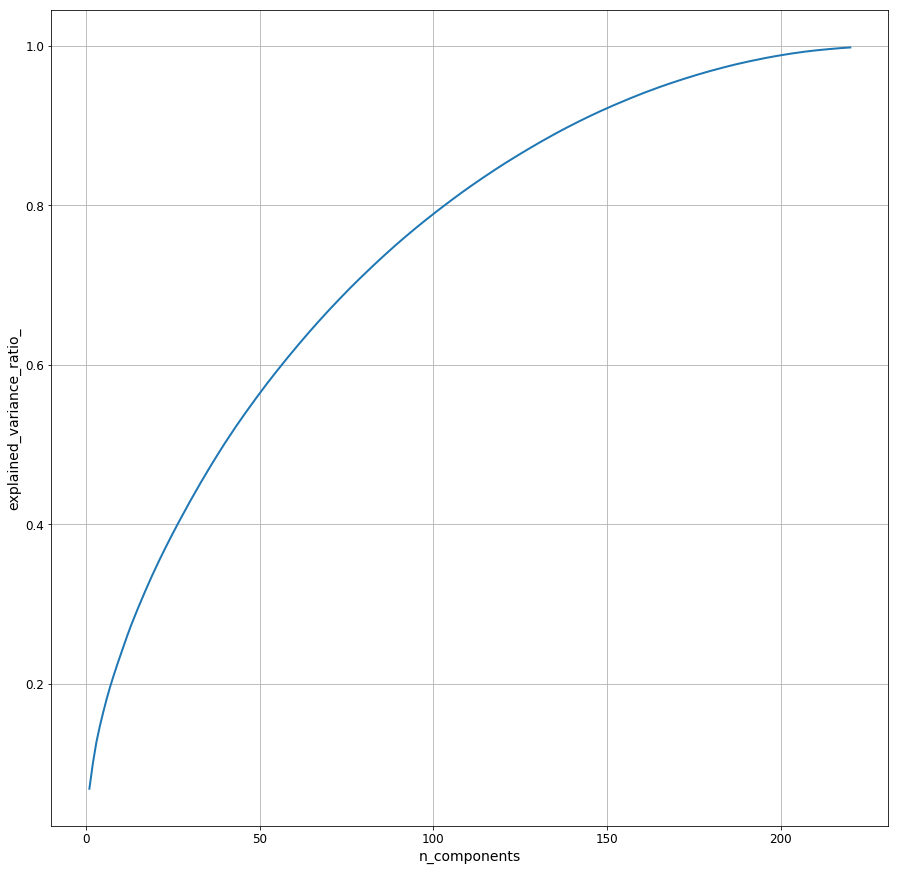

In [157]:
cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

220 переменных объяснили практически 100% дисперсии. Оставим этот вариант

In [180]:
X_train_pca = X_pca
X_test_pca = pca.transform(x_test_scaled)

### Кросс валиация данных

In [159]:
from sklearn.model_selection import cross_val_score

In [173]:
x = X_train_pca.copy()
y = y_train.copy()
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=5)

In [174]:
scores

array([0.89268293, 0.87317073, 0.87745098, 0.91666667, 0.91666667])

In [162]:
scores.mean()

0.895327594452415

Таким образом, мы можем видеть, что обобщающая способность нашей модели достаточно высока, разброс оценок невелик,это значит, что качество нашей модели не сильно зависит от разбиения данных.

### Построение модели

In [163]:
from sklearn.svm import SVC

In [176]:
x = X_train_pca.copy()
y = y_train.copy()
svm = SVC(kernel='rbf',random_state = 0, gamma = 90.0, C=100.0)
svm.fit(x,y)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=90.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
x_t = X_test_pca.copy()
y_t = y_test.copy()

svm.score(X_test_pca,y_test)

0.7031963470319634

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [181]:
x = X_train_pca.copy()
y = y_train.copy()
x_t = X_test_pca.copy()
y_t = y_test.copy()
rf = RandomForestClassifier(n_estimators=150, random_state=11)
rf.fit(x, y)
rf.score(x_t,y_t)

0.8858447488584474

In [182]:
x = X_train_pca.copy()
y = y_train.copy()
x_t = X_test_pca.copy()
y_t = y_test.copy()
score = LogisticRegression().fit(x,y).score(x_t, y_t)
score

0.91324200913242

In [183]:
xgb = xgboost.XGBClassifier(max_depth=4, n_jobs=-1)
# xgb = DecisionTreeClassifier()
xgb.fit(x, y)
y_train_predict = xgb.predict_proba(x)[:, 1]
y_test_predict = xgb.predict_proba(x_t)[:, 1]
roc_auc_train = np.round(roc_auc_score(y, y_train_predict), 2)
roc_auc_test = np.round(roc_auc_score(y_t, y_test_predict), 2)
print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  1.0
Test:  0.98


In [185]:
xgb.score(x_t,y_t)

0.9269406392694064

In [ ]:
XGBClassifier 